In [34]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [35]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


In [36]:
iters_num = 10000  
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [37]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [38]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i,"번째 acc |", str(train_acc) , ", " , str(test_acc))


0 번째 acc | 0.0993 ,  0.1032
600 번째 acc | 0.7756833333333333 ,  0.7839
1200 번째 acc | 0.8731666666666666 ,  0.8782
1800 번째 acc | 0.8977166666666667 ,  0.9002
2400 번째 acc | 0.9074166666666666 ,  0.9108
3000 번째 acc | 0.9134 ,  0.9149
3600 번째 acc | 0.9181 ,  0.9194
4200 번째 acc | 0.9230666666666667 ,  0.9248
4800 번째 acc | 0.9266666666666666 ,  0.9288
5400 번째 acc | 0.9304333333333333 ,  0.9333
6000 번째 acc | 0.9333166666666667 ,  0.9346
6600 번째 acc | 0.9353 ,  0.9358
7200 번째 acc | 0.9384666666666667 ,  0.9386
7800 번째 acc | 0.94035 ,  0.9404
8400 번째 acc | 0.9431166666666667 ,  0.9423
9000 번째 acc | 0.94545 ,  0.9439
9600 번째 acc | 0.9464333333333333 ,  0.9442


오버 피팅 발생 x

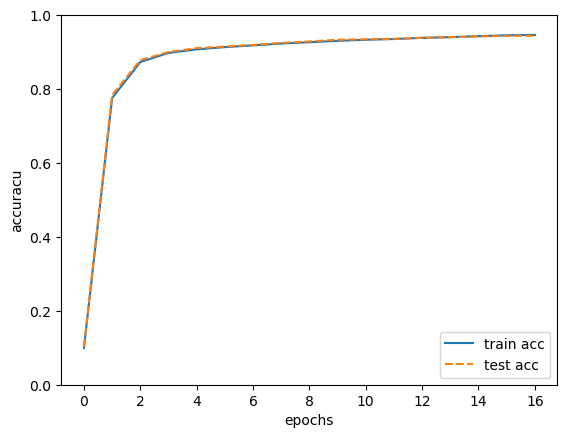

In [40]:
#그래프 그리기
markers ={'train':'0', 'test':'s'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label ='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracu")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()